# Importation des packages

In [309]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier


# Chargement des données

In [310]:
dataset = ("Credit Data_Fichier Clients.csv")

In [311]:
df = pd.read_csv(filepath_or_buffer = dataset, sep=",",index_col=0)
df.head()

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
month,,,,,,,,,,,,,
1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0,0
1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1,0
1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0,0
1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1,0
1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1,0


## Description de la base de données "credit_data_client.csv"

* month : Mois associé à l'enregistrement de la demande de crédit.
* credit_amount : Le montant du crédit demandé.
* credit_term : Durée du crédit en mois.
* age :  ge du client.
* sex : Sexe du client.
* education : Niveau d'éducation du client.
* product_type : Type de produit pour lequel le crédit est demandé.
* having_children_flg : Indicateur binaire pour la présence d'enfants.
* region : Région géographique du client.
* income : Revenu mensuel du client.
* family_status : Situation familiale du client.
* phone_operator : Type d'opérateur téléphonique utilisé par le client.
* is_client : Indicateur binaire si le client est déjà client de la banque.
* bad_client_target : Cible indiquant si un client est considéré comme mauvais (1) ou bon (0).


In [312]:
# Afficher les noms de colonnes mis à jour
print(df.columns)

Index(['credit_amount', 'credit_term', 'age', 'sex', 'education',
       'product_type', 'having_children_flg', 'region', 'income',
       'family_status', 'phone_operator', 'is_client', 'bad_client_target'],
      dtype='object')


## Qualité des données

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1723 entries, 1 to 12
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   credit_amount        1723 non-null   int64 
 1   credit_term          1723 non-null   int64 
 2   age                  1723 non-null   int64 
 3   sex                  1723 non-null   object
 4   education            1723 non-null   object
 5   product_type         1723 non-null   object
 6   having_children_flg  1723 non-null   int64 
 7   region               1723 non-null   int64 
 8   income               1723 non-null   int64 
 9   family_status        1723 non-null   object
 10  phone_operator       1723 non-null   int64 
 11  is_client            1723 non-null   int64 
 12  bad_client_target    1723 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 188.5+ KB


## Statistiques decriptives 

In [314]:
df.describe(include="all")

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client,bad_client_target
count,1723.000000,1723.000000,1723.000000,1723,1723,1723,1723.000000,1723.000000,1723.000000,1723,1723.000000,1723.000000,1723.000000
unique,NaN,NaN,NaN,2,6,22,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,male,Secondary special education,Cell phones,NaN,NaN,NaN,Another,NaN,NaN,NaN
freq,NaN,NaN,NaN,931,836,498,NaN,NaN,NaN,1201,NaN,NaN,NaN
mean,29264.654672,11.546721,35.911782,NaN,NaN,NaN,0.428323,1.681370,32652.350551,NaN,1.125363,0.604759,0.113755
std,27926.778301,6.548354,13.120203,NaN,NaN,NaN,0.494979,0.704256,20913.193158,NaN,1.015822,0.489044,0.317606
min,5000.000000,3.000000,18.000000,NaN,NaN,NaN,0.000000,0.000000,1000.000000,NaN,0.000000,0.000000,0.000000
25%,13000.000000,6.000000,26.000000,NaN,NaN,NaN,0.000000,2.000000,21000.000000,NaN,0.000000,0.000000,0.000000
50%,21500.000000,12.000000,32.000000,NaN,NaN,NaN,0.000000,2.000000,27000.000000,NaN,1.000000,1.000000,0.000000
75%,34000.000000,12.000000,44.000000,NaN,NaN,NaN,1.000000,2.000000,38000.000000,NaN,2.000000,1.000000,0.000000


In [315]:
df.isnull().sum()

credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64

# Descripition de la base de données

In [316]:
# Créer une nouvelle version du dataset sans la variable "Mauvais client"
df_new = df.drop(columns=['bad_client_target'])
df_new.head()

,credit_amount,credit_term,age,sex,education,product_type,having_children_flg,region,income,family_status,phone_operator,is_client
month,,,,,,,,,,,,
1,7000,12,39,male,Secondary special education,Cell phones,0,2,21000,Another,0,0
1,19000,6,20,male,Secondary special education,Household appliances,1,2,17000,Another,3,1
1,29000,12,23,female,Secondary special education,Household appliances,0,2,31000,Another,2,0
1,10000,12,30,male,Secondary special education,Cell phones,1,2,31000,Unmarried,3,1
1,14500,12,25,female,Higher education,Cell phones,0,2,26000,Married,0,1


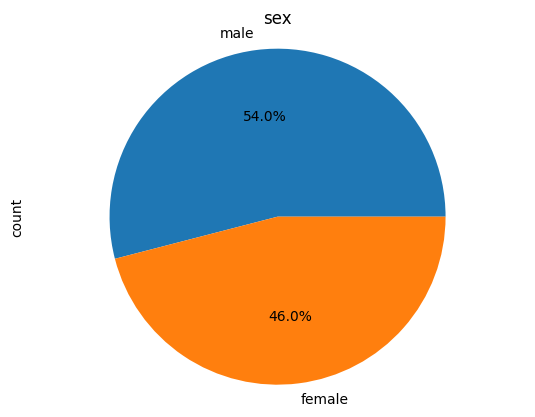

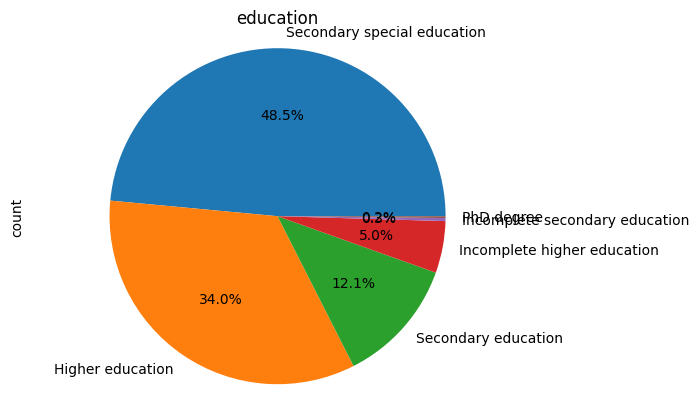

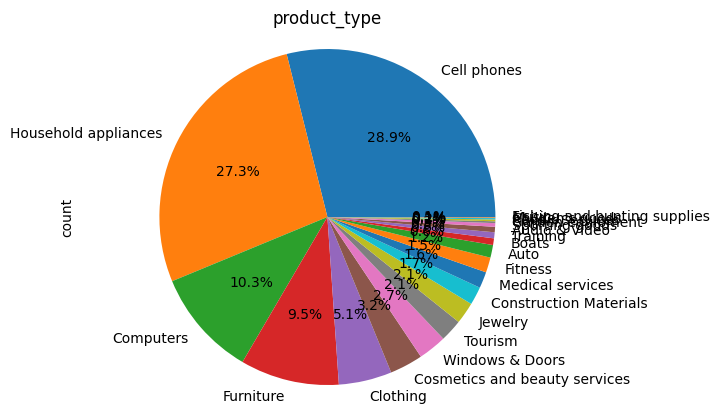

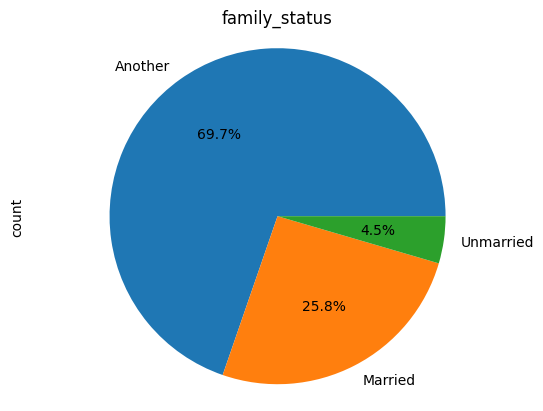

In [317]:
# Sélectionner les variables catégorielles
cat_vars = df.select_dtypes(include=['object']).columns


# Générer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()


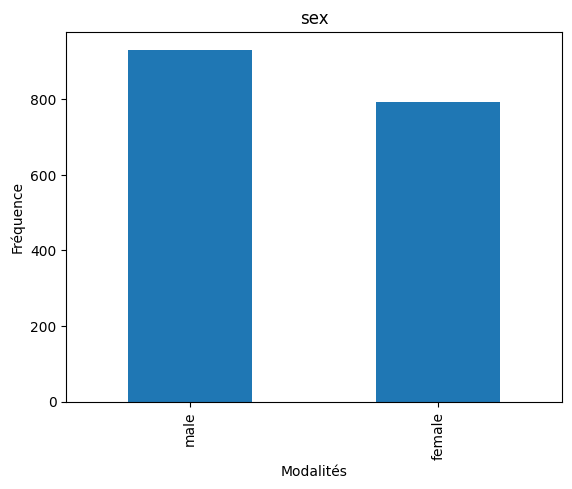

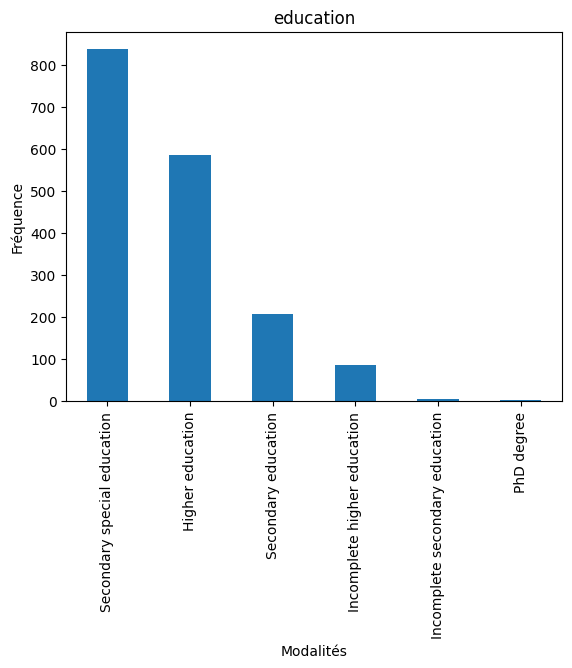

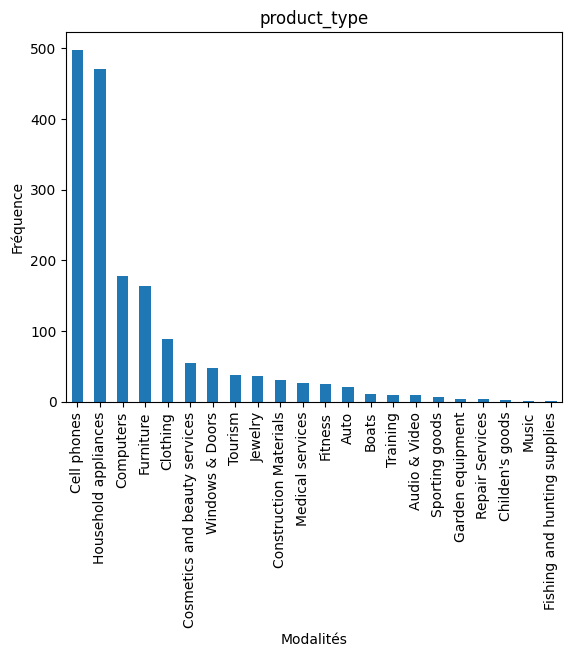

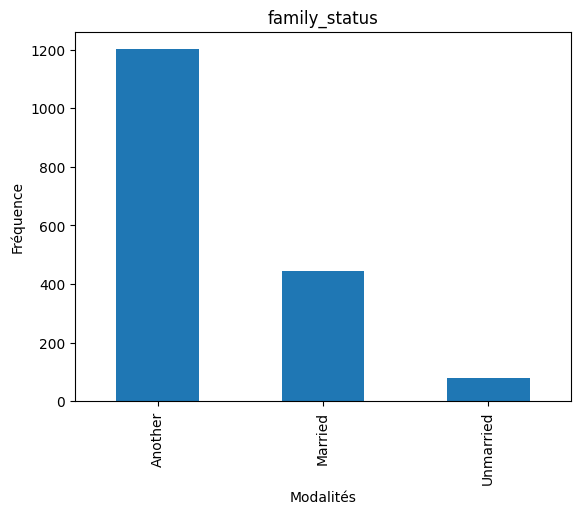

In [318]:
# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.show()

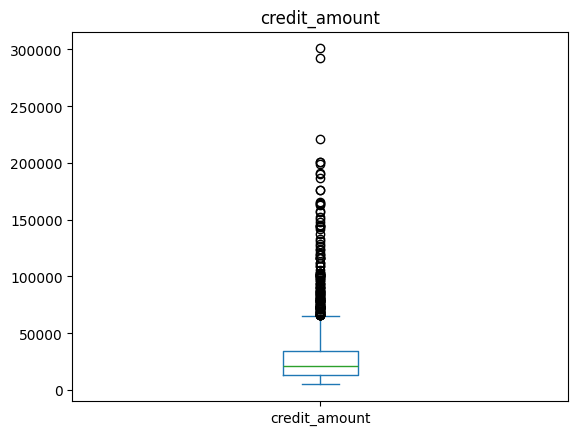

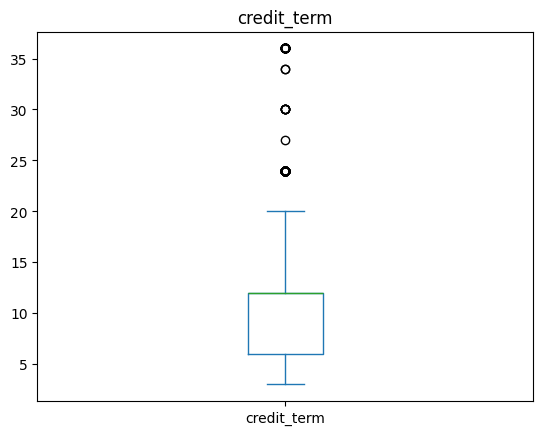

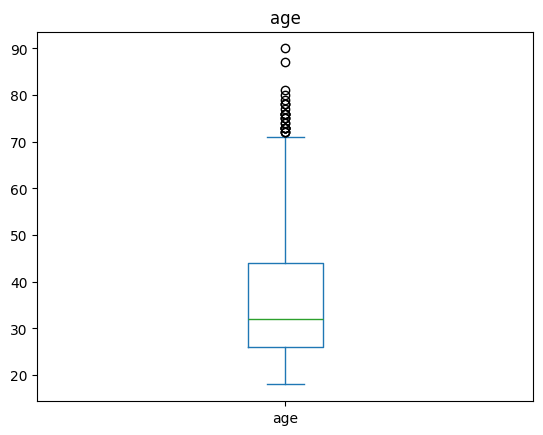

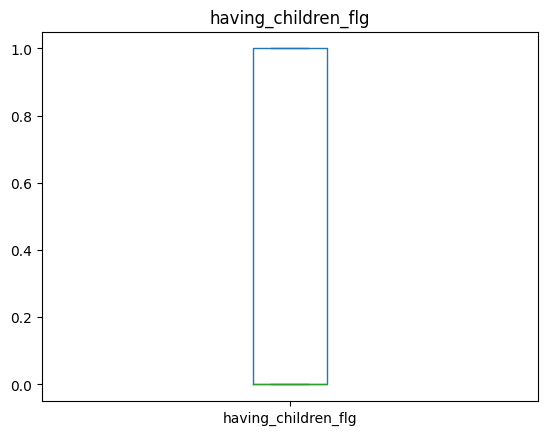

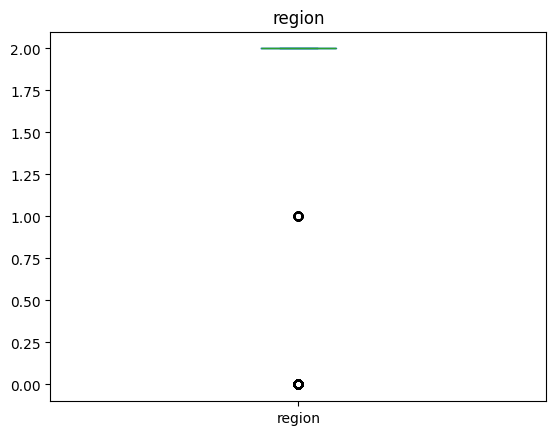

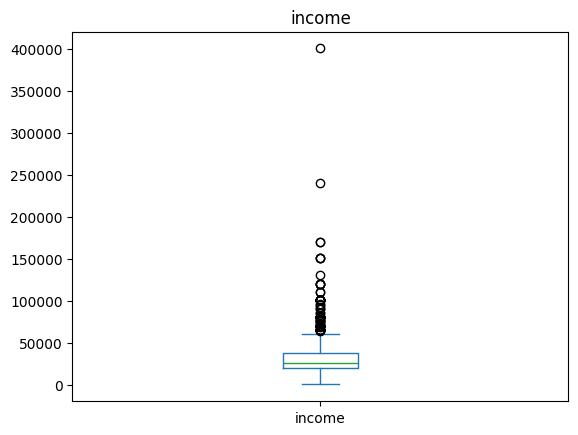

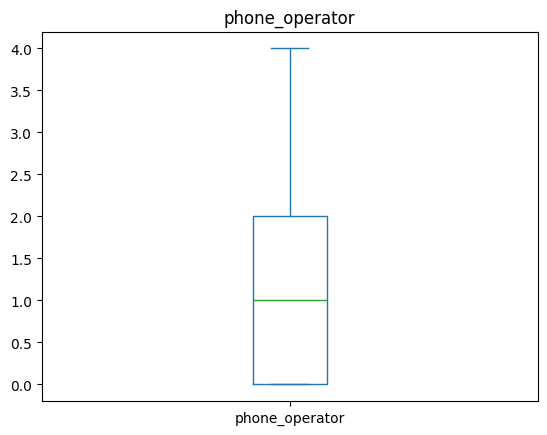

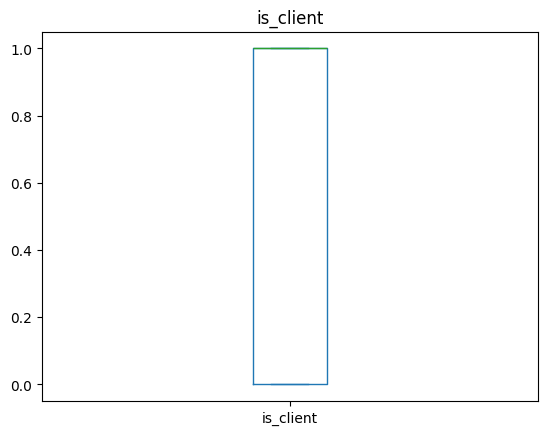

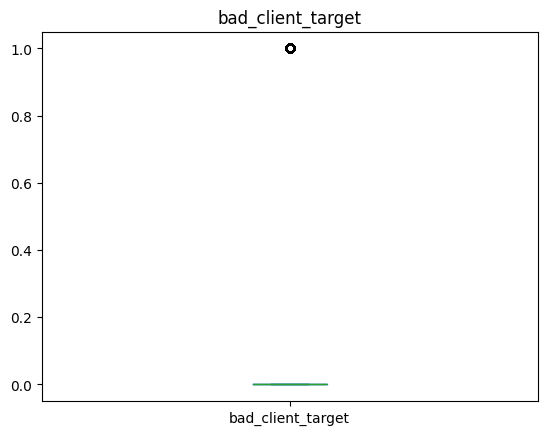

In [319]:
# Sélectionner les variables numériques
num_vars = df.select_dtypes(exclude=['object']).columns

# Générer un box plot pour chaque variable numérique
for var in num_vars:
    df[var].plot(kind='box')
    plt.title(var)
    plt.show()

# Analyses bivariée

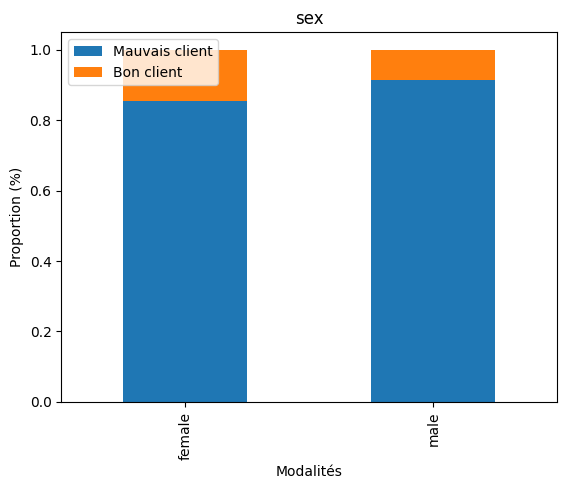

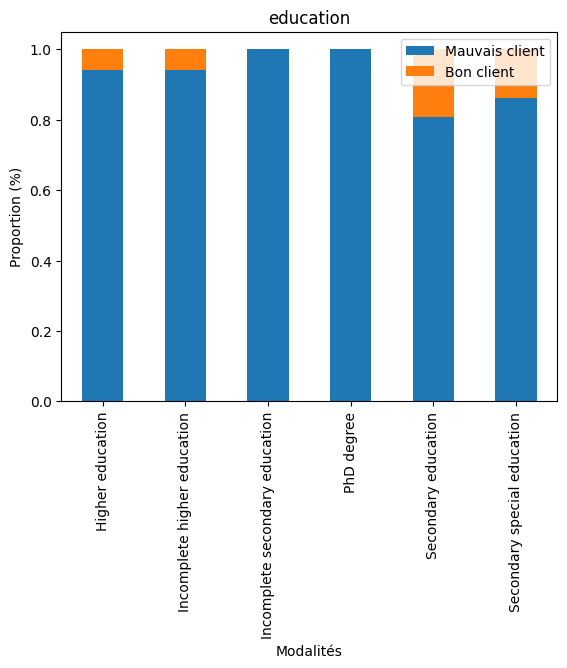

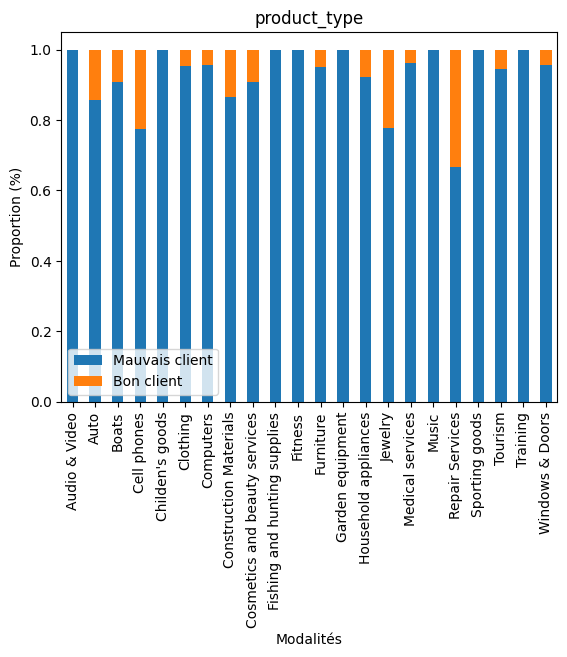

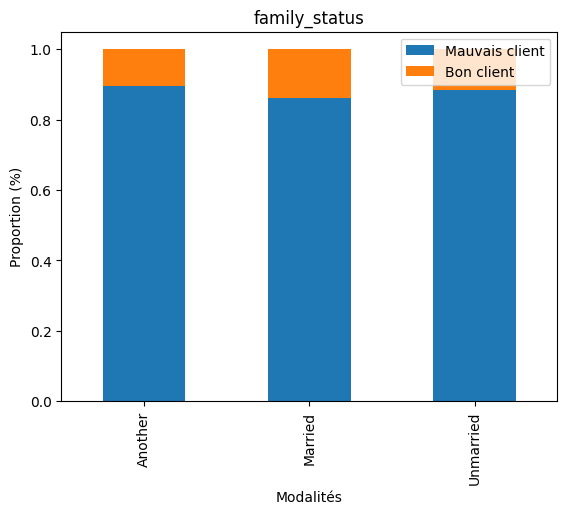

In [320]:
# Sélectionner les variables catégorielles
cat_vars = df.select_dtypes(include=['object']).columns

# Générer un count plot pour chaque variable catégorielle
# Définir la taille des figures
# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    figsize = (20, 20)
    (df.groupby([var, 'bad_client_target'])['bad_client_target'].count()/df.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Mauvais client', 'Bon client'])
    plt.show()

In [321]:
# Sélectionner les variables catégorielles
cat_vars = df.select_dtypes(include=['object']).columns

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(df['bad_client_target'], df[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

        Variable        Chi2      P-valeur  V de Cramer
2   product_type  107.885819  1.132620e-13     0.224609
1      education   38.453863  3.058442e-07     0.139376
0            sex   14.960899  1.097622e-04     0.090039
3  family_status    4.068007  1.308108e-01     0.034645


C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


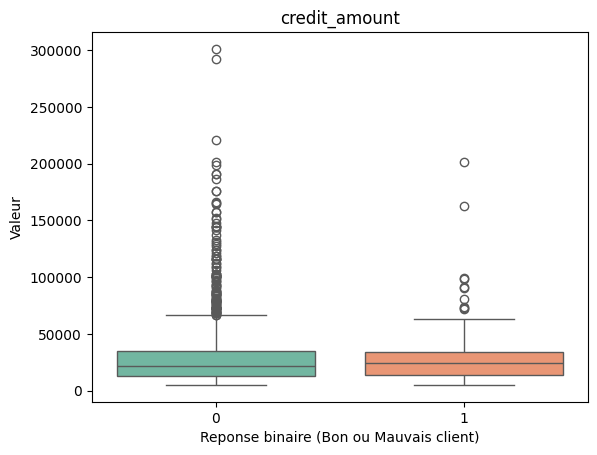

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


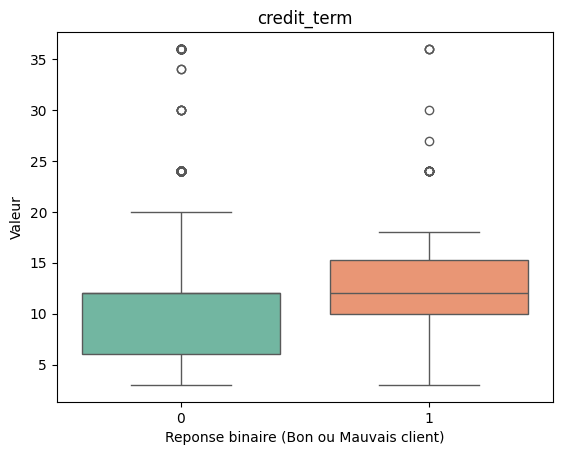

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


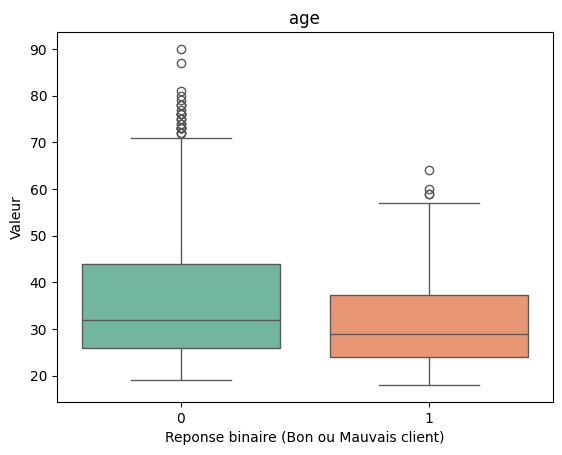

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


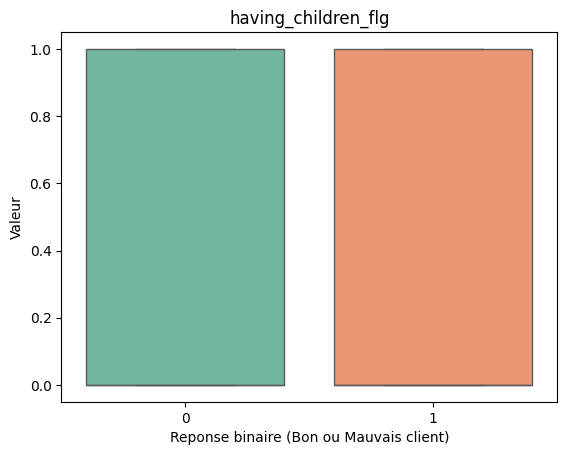

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


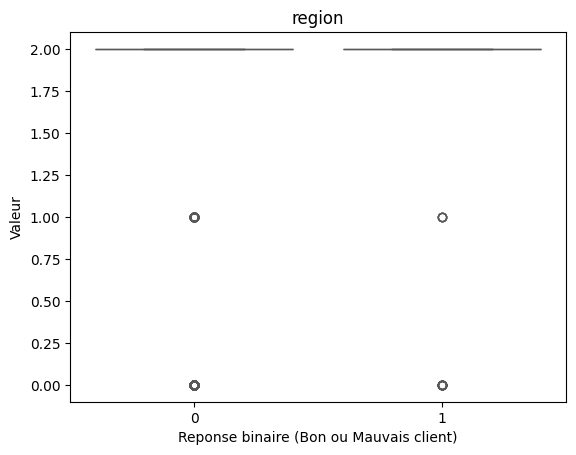

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


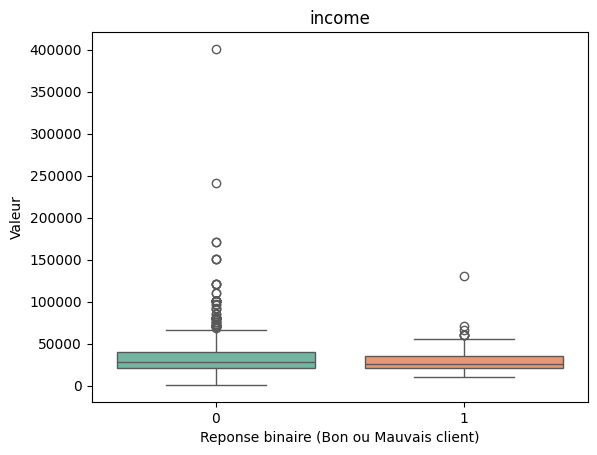

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


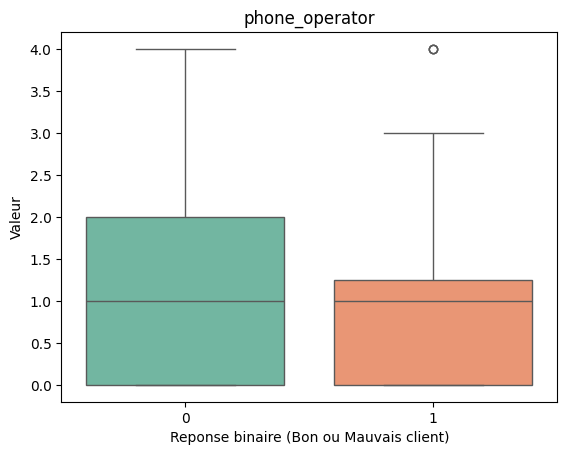

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


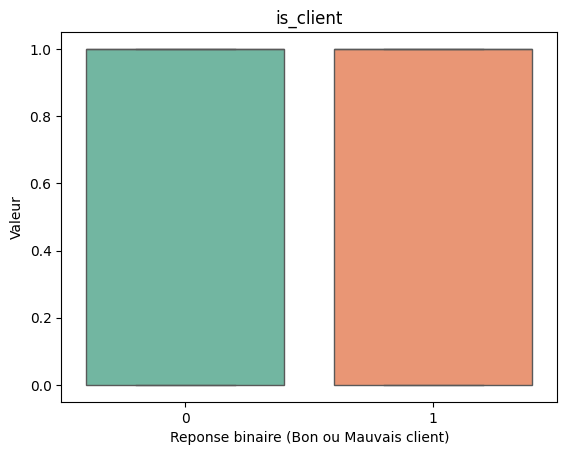

C:\Users\Franck\AppData\Local\Temp\ipykernel_28984\1011941785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')


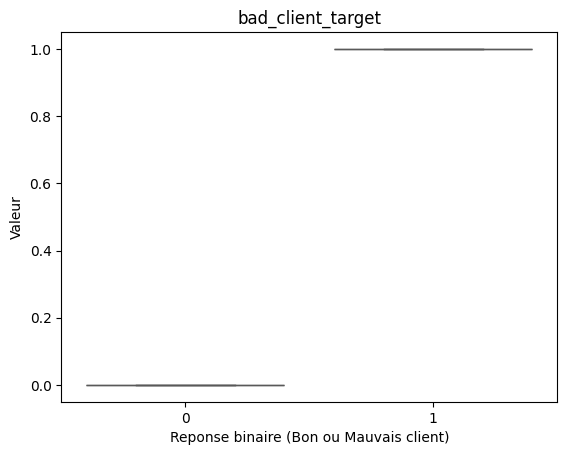

In [322]:
for var in num_vars:
    sns.boxplot(x='bad_client_target', y=var, data=df, palette='Set2')
    plt.title(var)
    plt.xlabel('Reponse binaire (Bon ou Mauvais client)')
    plt.ylabel('Valeur')
    plt.show()

In [323]:
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in num_vars:
    # Calculer les groupes de valeurs
    groups = [df[df['bad_client_target'] == 0][var], df[df['bad_client_target'] == 1][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
print(results_df)

              Variable  Kruskal-Wallis      P-valeur
8    bad_client_target     1722.000000  0.000000e+00
1          credit_term       24.670782  6.800741e-07
7            is_client       16.862037  4.019758e-05
2                  age       15.818010  6.973556e-05
3  having_children_flg        6.751797  9.365334e-03
4               region        3.779950  5.187022e-02
5               income        3.211254  7.313339e-02
6       phone_operator        1.909621  1.670054e-01
0        credit_amount        0.670144  4.130014e-01


# Modélisation

* Modèle de Regression logistique

In [324]:
# Sélectionner les caractéristiques et la variable cible
X = df.drop(columns=['bad_client_target'])
y = df['bad_client_target']

In [325]:
# Encoder les variables catégorielles
X = pd.get_dummies(X, columns=['sex', 'education', 'product_type', 'family_status', 'region', 'phone_operator'])

In [326]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
# Standardiser les variables caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [328]:
# Résumé des résultats de la régression avec statsmodels
X_train_sm = sm.add_constant(X_train)  # Ajouter une constante pour l'interception
model_sm = sm.Logit(y_train, X_train_sm)
result = model_sm.fit()
print(result.summary())

         Current function value: 0.477280
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      bad_client_target   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1336
Method:                           MLE   Df Model:                           41
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                 -0.3514
Time:                        19:57:42   Log-Likelihood:                -657.69
converged:                      False   LL-Null:                       -486.67
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2419   4.28e+07  -7.57e-08      1.000   -8.39e+07    8.39e+07
x1             0.1090      0.134      0.812      0.417      -0.15

c:\Users\Franck\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [329]:
# Créer le modèle de régression logistique
model = LogisticRegression()

In [330]:
# Entraîner le modèle
model.fit(X_train, y_train)

LogisticRegression()

In [331]:
# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [332]:
# Prédictions de probabilité pour les courbes ROC
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]


In [333]:
# Évaluer le modèle
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')


Accuracy Train: 0.888243831640058
Accuracy Test: 0.8840579710144928


In [334]:
# Calculer ROC et AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)
print(f'AUC Train: {auc_train}')
print(f'AUC Test: {auc_test}')

AUC Train: 0.7906332619916908
AUC Test: 0.7327868852459016


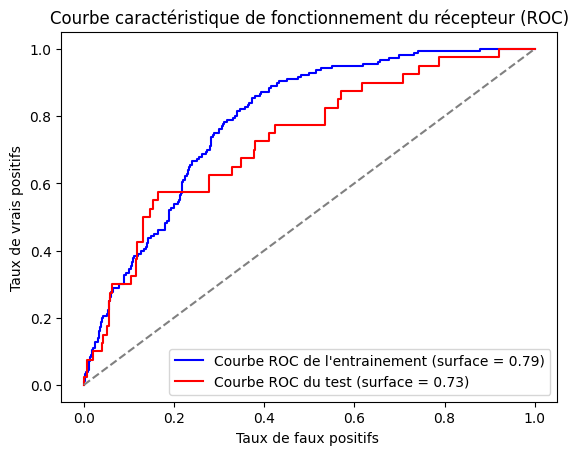

In [335]:
# Tracer les courbes ROC
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label=f'Courbe ROC de l\'entrainement (surface = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Courbe ROC du test (surface = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Taux de faux positifs ')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe caractéristique de fonctionnement du récepteur (ROC)')
plt.legend(loc='lower right')
plt.show()

* Modèle KNN

In [336]:
# Sélectionner les caractéristiques et la variable cible
X = df.drop(columns=['bad_client_target'])
y = df['bad_client_target']

In [337]:
# Encoder les variables catégorielles
X = pd.get_dummies(X, columns=['sex', 'education', 'product_type', 'family_status', 'region', 'phone_operator'])

In [338]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:

# Standardiser les variables caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [340]:

# Liste pour stocker les scores de validation croisée
k_values = range(1, 21)
cv_scores = []

In [341]:

# Calculer les scores de validation croisée pour chaque k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [342]:
# Afficher le meilleur k
best_k = k_values[np.argmax(cv_scores)]
print(f'Best k: {best_k}')

Best k: 18


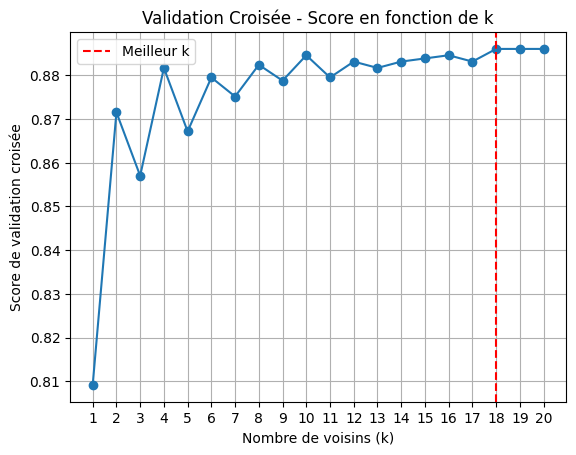

In [343]:
# Tracé des scores de validation croisée en fonction de k
plt.figure()
plt.plot(k_values, cv_scores, marker='o')
plt.title('Validation Croisée - Score en fonction de k')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de validation croisée')
plt.xticks(k_values)
plt.axvline(best_k, color='r', linestyle='--', label='Meilleur k')
plt.legend()
plt.grid(True)
plt.show()

In [344]:
# Créer le modèle KNN avec le meilleur k
knn = KNeighborsClassifier(n_neighbors=best_k)

In [345]:
# Entraîner le modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [346]:
# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [347]:
# Évaluer le modèle
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

c:\Users\Franck\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Franck\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Franck\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [348]:
# Afficher les résultats
print(f'Accuracy Train: {accuracy_train}')
print(f'Accuracy Test: {accuracy_test}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy Train: 0.8867924528301887
Accuracy Test: 0.8840579710144928
Confusion Matrix:
[[305   0]
 [ 40   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       305
           1       0.00      0.00      0.00        40

    accuracy                           0.88       345
   macro avg       0.44      0.50      0.47       345
weighted avg       0.78      0.88      0.83       345

